# MATA50 - Exercícios da Semana 05

*   Grupo: Brócolis
*   Autores: Bruno do Amor Divino da Paixao (Responsável), Lucas Morais Barreto, Gustavo Mendel Queiroz e Souza



# Instruções (não apagar)
1.   Após criar este notebook, altere o nome do notebook/documentação incluindo o nome do vegetal do seu grupo. Por exemplo, se você é do grupo Carambola, altere o nome do notebook para "MATA50-Semana05-Carambola.ipynb"
1. Compartilhe este documento com todos os membros do grupo (para participarem da elaboração deste documento). É importante que o notebook utilizado seja o mesmo compartilhado para que os registros de participação e colaboração fiquem salvos no histórico.
1.   Incluia o nome completo dos autores na lista de autores que auxiliaram na elaboração deste notebook. Destaque o responsável como sendo o(a) primeiro(a) autor(a).
1. Utilize os recursos de blocos de texto e de código para adicionar as suas respostas, sem alterar os blocos de texto e código existente. Não economize, esses blocos são de graça.
1. Ao concluir a atividade, compartilhe o notebook com januario.ufba@gmail.com (dando permisão para edição) e deixando o aviso de notificação marcado, para que eu receba o seu e-mail.



In [ ]:
#@title Implementação dos modelos em Python
#@markdown Esta célula contém a implementação em Python 3 dos principais modelos de computação vistos na disciplina de Linguagens Formais e Autômatos. 
#@markdown Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Acompanhe os exemplos e experimente construir seus próprios modelos.
 
#@markdown >*Execute esta célula (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as classes implementadas.*
 
from graphviz import Digraph
import re
 
class AP: 
    def __init__(self, Q={}, Sigma={}, Gamma={}, delta={}, q0=0, F={}):
        self.states = Q
        self.inputAlphabet = Sigma
        self.stackAlphabet = Gamma
        self.transition = delta
        self.startState = q0
        self.acceptStates = F 
 
        self.initialize()
 
    def initialize(self, input_string=""):
        self.traces = [[(self.startState,tuple(input_string),())]]
 
    def check(self):
        pass
        
    def hasNext(self):
        return self.traces and (not self.acceptTraces())
    
    def acceptTraces(self):
        return [t for t in self.traces if t[-1][1] == () and t[-1][0] in self.acceptStates]
 
    def step(self):
        updated_traces = []
        for trace in self.traces:
          s, string, stack = trace[-1]
          A = {'', string[0]} if string else {''}
          B = {'', stack[-1]} if stack else {''}
          possible_transitions = [(s,a,b) for a in A for b in B if (s,a,b) in self.transition]          
          for (s,a,b) in possible_transitions:  
            for r,c in self.transition[s,a,b]:
              nstring = string[1:] if a else string
              nstack  = stack[:-1] if b else stack
              nstack  = nstack+(c,) if c else nstack
              if (not (r,nstring,nstack) in trace):
                updated_traces.append(trace+[(r,nstring,nstack)])
        self.traces = updated_traces
 
    def run(self, input_string=0, max_steps=1000):        
        while (self.hasNext()): 
          if max_steps == 0: 
            raise Exception("Timeout")
          self.step()
          max_steps -= 1
        return self.result()
 
    def aceita(self, input_string=0):
        self.initialize(input_string)
        return self.run()
 
    def result(self):
        return True if self.acceptTraces() else (False if (not self.traces) else None)
    
    def visualizar(self):      
        f = Digraph('finite_state_machine', filename='fsm.gv')
        f.attr(rankdir='LR', size='8,5')
 
        f.attr('node', shape='point')
        f.node('')
        
        f.attr('node', shape='doublecircle')
        for n in self.acceptStates:
          f.node(str(n))
 
        f.attr('node', shape='circle')
        for n in self.states.difference(self.acceptStates):
          f.node(str(n))
 
        label = {}        
        for (q,a,b) in self.transition:
          for (r,c) in self.transition[q,a,b]:          
            label[q,r] = label[q,r]+[(a,b,c)] if (q,r) in label else [(a,b,c)]
 
        f.edge('', str(self.startState))
        for (q,r) in label:
          f.edge(str(q),str(r),label=self.graphviz_edge_label_format(label[q,r]))      
          pass
        
        return f
    
    def graphviz_edge_label_format(self,labels=[]):
        epsilon = "\u03BB"
        right_arrow = "\u2192"
        return '\n'.join([(a if (a or a==0) else epsilon) + "," + (b if (b or b==0) else epsilon) + right_arrow + (c if (c or c==0) else epsilon) for (a,b,c) in labels])
        # return '\n'.join([(str(a) if a else epsilon) + "," + (str(b) if b else epsilon) + right_arrow + (str(c) if c else epsilon) for (a,b,c) in labels])
 
class AFN(AP):
  def __init__(self, Q={}, Sigma={}, delta={}, q0=0, F={}):
        delta_pda = {}
        for q,a in delta:
          delta_pda[q,a,''] = {(r,'') for r in delta[q,a]}
        super().__init__(Q,Sigma,{},delta_pda,q0,F)
  
  def graphviz_edge_label_format(self,labels):
      epsilon = "\u03B5"
      return ",".join([(str(a) if (a or a==0) else epsilon) for (a,b,c) in labels])
 
class AFD(AFN):
  def __init__(self, Q={}, Sigma={}, delta={}, q0=0, F={}):
        delta_nfa = {}
        for (q,a) in delta:
          delta_nfa[q,a] = {delta[q,a]}
        super().__init__(Q,Sigma,delta_nfa,q0,F)
 
class ER:
  def __init__(self,regex=None):  
    if (regex == None):
      self.regex = None
    elif (re.match("^[a-zA-Z0-9\(\)\|\*]*$", regex)):
      self.regex = regex
    else:
      raise Exception("Invalid pattern")
 
  def gera(self, input_string):
    if (self.regex == None):
      return False
    else:
      return True if re.match("^"+self.regex+"$",input_string) else False
 
class GLC:
  def __init__(self,V,Sigma,R,S):
      self.variables = V
      self.terminals = Sigma
      # self.rules = R
      self.rules = {(a, tuple(b)) for (a,b) in R}
      self.start = S
 
      self.derivation = []
      self.chomsky = None
  
  def gera(self, string):
      if (not self.chomsky):
        self.chomsky = self.to_chomsky()        
      G = self.chomsky
      
      if len(string) == 0: return (G.start,()) in G.rules
 
      # CYK Algorithm
      n = len(string)
      P = [[[] for x in range(n - y)] for y in range(n)]
      for i,c in enumerate(string):
        for v in [a for (a,b) in G.rules if len(b) == 1 and c in b]:
          P[0][i] += [v]
      for l in range(2, n+1): # borda da iteração
        for s in range(0, n+1-l): # coluna
          for p in range(1, l): # linha
            for u, v in [(a,b) for (a,b) in G.rules if len(b) == 2]:
              if v[0] in P[p-1][s] and v[1] in P[l-p-1][s+p]:
                P[l-1][s] += [u]
      return G.start in P[-1][0]
 
  def print(self):
      rightarrow = "\u2192"
      print(self.start,rightarrow, '|'.join([''.join(y) for x,y in self.rules if x == S]))
      for v in sorted(self.variables.difference(self.start)): 
        print(v,rightarrow, '|'.join([''.join(y) for x,y in self.rules if x == v]))
 
  def replace_eps(self, v, l):
    if not l: return {()}
    result = {(l[0],) + s for s in self.replace_eps(v, tuple(l[1:]))}
    if l[0] == v:
      result.update({tuple(s[1:]) for s in result})
    return result   
 
  def to_chomsky(self):
      n_state = 0
      
      S = '<{}>'.format(n_state)
      Sigma = self.terminals 
      V = {S}.union(self.variables)
      R = {(S,(self.start,))}.union(self.rules)
 
      target = {alpha for alpha in self.variables if (alpha,()) in R}
      while (target):
        for e in target:
          rules = {(alpha,beta) for (alpha,beta) in R if e in beta}
          for (a,b) in rules:
            R.update({(a, beta) for beta in self.replace_eps(e,b)})
          R.discard((e,()))
        target = {alpha for alpha in self.variables if (alpha,()) in R}
      
      target = {(a,b) for (a,b) in R if len(b) == 1 and b[0] in V}
      while (target):
        for u,v in target:
          rules = {b for (a,b) in R if a == v[0]}
          R.update({(u,b) for b in rules})
          R.discard((u,v))
        target = {(a,b) for (a,b) in R if len(b) == 1 and b[0] in V}
      
      target = {(alpha,beta) for (alpha,beta) in R if len(beta) > 2}
      while(target):
        for u,v in target:
          n_state += 1
          state = '<{}>'.format(n_state)
          V.update({state})
          R.update({(u,(v[0],state)),(state, tuple(v[1:]))})
          R.discard((u,v))
        target = {(alpha,beta) for (alpha,beta) in R if len(beta) > 2}
 
      target = {(alpha,beta) for (alpha,beta) in R if len(beta) == 2}
      for u,v in target:
        n = list(v)
        for i in range(2):
          if v[i] in Sigma:
            R.discard((u,(n[0],n[1])))
            n_state += 1
            n[i] = '<{}>'.format(n_state)
            V.update({n[i]})
            R.update({(u,(n[0],n[1]))})
            R.update({(n[i],(v[i],))})
 
      return GLC(V,Sigma,R,S)

# Exercícios

Construa autômatos com a menor quantidade de estados possíveis. Considere que o símbolo na posicao 1 de uma palavra e o primeiro símbolo desta, o símbolo na posicao 2 e o segundo, e assim por diante.

1. Construa um AFD para a seguinte linguagem sobre o alfabeto $\Sigma = \{0, 1\}$: O conjunto das palavras em que o símbolo na posicao $2i$ difere do símbolo na posicao $2 i + 2$ , para $i  \geq  1$.

True


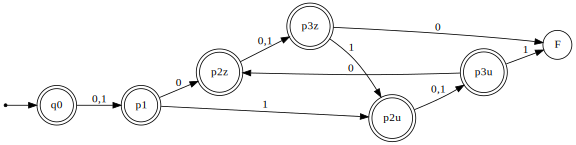

In [ ]:
#@title Q.01

#Q = Estados 
Q = { 'q0', 'p1', 'p2z', 'p2u', 'p3z', 'p3u', 'F'}   

Sigma = {'0','1'}    #Alfabeto
delta = {            #Função de transição
  #1 letra
  ('q0', '0'):'p1',
  ('q0', '1'):'p1',

  #2 letra
  ('p1', '0'):'p2z',
  ('p1', '1'):'p2u',

  #3 letra
  ('p2z', '0'):'p3z',
  ('p2z', '1'):'p3z',

  ('p2u', '0'):'p3u',
  ('p2u', '1'):'p3u',
  
  #4 letra: validação
  ('p3z', '1'):'p2u',
  ('p3u', '0'):'p2z',

  #caso de falha:
  ('p3z', '0'):'F',
  ('p3u', '1'):'F',
  
}

q0 = 'q0'           #Estado Inicial
F = {'p2u','p2z', 'q0', 'p1', 'p3z', 'p3u'}           #Estado Final
 
M = AFD(Q,Sigma,delta,q0,F)

print(M.aceita("00"))
M.visualizar()


2. Construa um AFD para a seguinte linguagem sobre o alfabeto $\Sigma = \{0, 1\}$: O conjunto das palavras em que o símbolo na posicao $2i  -  1$ difere do símbolo na posicao $2i$, para $i  \geq  1$.

False


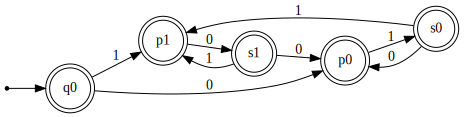

In [ ]:
#@title Q.02

#Q = Estados 
Q = { 'q0', 'p0', 'p1', 's0', 's1'}   

Sigma = {'0','1'}    #Alfabeto
delta = {            #Função de transição
  
  ('q0', '0'): 'p0',
  ('q0', '1'): 'p1',

  ('p0', '1'): 's0',
  ('p1', '0'): 's1',

  ('s1', '1'): 'p1',
  ('s0', '0'): 'p0',

  ('s0', '1'): 'p1',
  ('s1', '0'): 'p0',
  
}

q0 = 'q0'                               #Estado Inicial
F = {'q0', 'p0', 's0', 'p1', 's1'}            #Estado Final
 
M = AFD(Q,Sigma,delta,q0,F)

print(M.aceita("011000"))
M.visualizar()

3. Construa um AFD para a seguinte linguagem sobre o alfabeto $\Sigma = \{0, 1\}$: O conjunto das palavras em que o símbolo na posicao $i$ difere do símbolo na posicao $i + 2$ , para $i  \geq  1$.

False


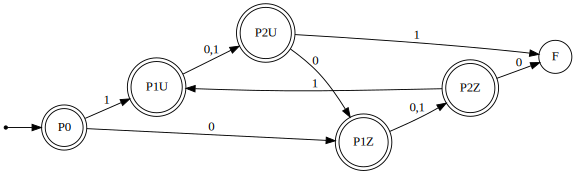

In [ ]:
#@title Q.03

Q={'P0', 'P1Z', 'P1U','P2Z', 'P2U'}
Sigma={'0', '1'}
delta={
    ('P0', '0'): 'P1Z',
    ('P0', '1'): 'P1U',

    ('P1U', '0'): 'P2U',
    ('P1U', '1'): 'P2U',
    
    ('P1Z', '0'): 'P2Z',
    ('P1Z', '1'): 'P2Z',

    ('P2Z', '1'): 'P1U',
    ('P2U', '0'): 'P1Z',

    ('P2Z', '0'): 'F',
    ('P2U', '1'): 'F',
    }

q0='P0'
F={'P0', 'P1U', 'P1Z', 'P2U', 'P2Z'}

M = AFD(Q,Sigma,delta,q0,F)

print(M.aceita('01101'))
M.visualizar()

4. Construa um AFD para a seguinte linguagem sobre o alfabeto $\Sigma = \{0, 1\}$: O conjunto das palavras com numero ímpar de 0’s nas posicoes ímpares e numero par de 0’s nas posicoes pares.

True


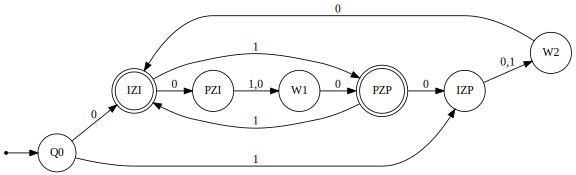

In [ ]:
#@title Q.04 INCOMPLETA

#P ou I no inicio do Estado significa posição Par ou Impar, respectivamente
#ZI = ZERO IMPAR #ZP = ZERO PAR

Q={'Q0', } 
Sigma={'0', '1'}
delta={
    #1 LETRA
    ('Q0', '0'): 'IZI',   #1 letra
    ('Q0', '1'): 'IZP',   #1 letra

    #2 letra
    ('IZI', '0'): 'PZI', #deve ter outro zero em outra posição par
    ('IZI', '1'): 'PZP',

    ('PZI', '1'): 'W1',   #a palavra ainda é válida, continua

    ('PZI', '0'): 'W1',   #deve receber outro zero em outra posição impar

    ('W1', '0'): 'PZP',    
    #----

    ('PZP', '0'): 'IZP',  #Pos Impar, Zero Par
    ('PZP', '1'): 'IZI',  #Continua tendo zeros impares nas posições impares

    ('IZP', '0'): 'W2',  #indifere   
    ('IZP', '1'): 'W2',  #indifere   

    
    ('W2', '0'): 'IZI', 



    }

q0='Q0'
F={'IZI', 'PZP'}

M = AFD(Q,Sigma,delta,q0,F)

print(M.aceita('01'))
M.visualizar()

5. Construa um AFD para a seguinte linguagem sobre o alfabeto $\Sigma = \{0, 1\}$: O conjunto das palavras de tamanho par com 1’s nas posicoes pares, unido ao conjunto das palavras de tamanho ímpar com 1’s nas posicoes ímpares.

False


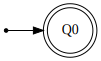

In [ ]:
#@title Q.05

Q={'Q0' } 
Sigma={'0', '1'}
delta={

    ('Q0', '1'): {'1'}
    ('Q0', '1'): {'1'}


    }

q0='Q0'
F={'Q0'}

M = AFD(Q,Sigma,delta,q0,F)

print(M.aceita('01'))
M.visualizar()

6. Construa um AFN para a seguinte linguagem sobre o alfabeto $\Sigma = \{a,b,c\}$:  O conjunto das palavras em que existem duas ocorrencias de abc com um
numero ímpar de símbolos entre elas.

True


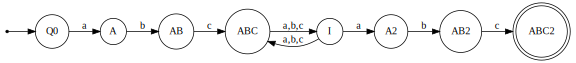

In [ ]:
#@title Q.06
Q={'Q0', 'A', 'AB', 'ABC', 'A2', 'AB2', 'ABC2', 'I'} 
Sigma={'a', 'b', 'c'}
delta={
    ('Q0', 'a'): {'A'},
    ('A', 'b'): {'AB'},
    ('AB', 'c'): {'ABC'},


    ('ABC', 'a'): {'I'},
    ('ABC', 'b'): {'I'},
    ('ABC', 'c'): {'I'},

    ('I', 'a'): {'ABC', 'A2'},
    ('I', 'b'): {'ABC'},
    ('I', 'c'): {'ABC'},


    ('A2', 'b'): {'AB2'},
    ('AB2', 'c'): {'ABC2'},


    
    }

q0='Q0'
F={'ABC2'}

M = AFN(Q,Sigma,delta,q0,F)

print(M.aceita('abcaabcaabc'))
M.visualizar()

7. Construa um AFN para a seguinte linguagem sobre o alfabeto $\Sigma = \{a, b,c\}$: O conjunto das palavras em que o ultimo símbolo tenha ocorrido antes no maximo uma vez.

8. Construa um AFN sobre $\Sigma = \{a, b\}$ que reconheça o conjunto das palavras com no mínimo um a ou um b.


True


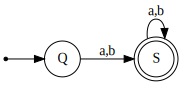

In [ ]:
#@title Q.08

#Q = Estados 
Q = { 'Q', 'S'}   

Sigma = {'a','b'}    #Alfabeto
delta = {            #Função de transição
   ('Q', 'a'):'S',
   ('Q', 'b'):'S',

   ('S', 'a'):'S',
   ('S', 'b'):'S',
  
}

q0 = 'Q'           #Estado Inicial
F = {'S'}           #Estado Final
 
M = AFN(Q,Sigma,delta,q0,F)

print(M.aceita("a"))
M.visualizar()

9. Construa um AFD sobre $\Sigma = \{a, b\}$ que reconheça o conjunto das palavras com quantidade par de $a$'s ou ímpar de $b$'s (mas não ambos). 

10. Construa uma Gramatica com a menor quantidade de regras possível para gerar os casos de teste do problema: https://www.urionlinejudge.com.br/judge/pt/problems/view/1726

As variáveis:
  C representa um conjunto
  A representa os elementos do conjunto
  O representa um operador ( + - * )

Os terminais:
  L representa uma letra do alfabeto de A a Z.

In [ ]:
V = {'c', 'a', 'o', 'p'} #variaveis
Sigma = {'{', '}', '(', ')', '+', '-', '*'
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'
        } #terminais
S = 'c' # partida
R = { #regras
     
  #Parenteses 

  #Conjunto com operações
  ('c', 'coc'),
  ('c', '(c)'),
  ('c', '{a}'),
  
  #Letras
  ('a', 'aa'),
  ('a', ''),

  ('a', 'A'), ('a', 'B'), ('a', 'C'),('a', 'D'), ('a', 'E'), ('a', 'F'),
  ('a', 'G'), ('a', 'H'), ('a', 'I'),('a', 'J'), ('a', 'K'), ('a', 'L'),
  ('a', 'M'), ('a', 'N'), ('a', 'O'),('a', 'P'), ('a', 'Q'), ('a', 'R'),
  ('a', 'S'), ('a', 'T'), ('a', 'U'),('a', 'V'), ('a', 'W'), ('a', 'X'), 
  ('a', 'Y'), ('a', 'Z'),


  #Operadores
  ('o', '+'),
  ('o', '-'),
  ('o', '*')

}

G = GLC(V, Sigma, R, S)
G.print()

G.gera("({AC})-{A}")

c → {a}|coc|(c)
a → C||B|aa|A
o → -|*|+
p → 


True